## <font color = 'blue'> 2.2 数值微分 </font>

### 2.2.1一阶微分

<img src ="Images/2-12.png" alt = "Drawing" style = "width:500px" align = 'center'>

<img src ="Images/2-13.png" alt = "Drawing" style = "width:500px" align = 'center'>

<font color = 'red'>**对于一次微分，一般来说中心差分法得到的结果更加准确。**</font>

### 2.2.2 二阶微分

<img src ="Images/2-14.png" alt = "Drawing" style = "width:500px" align = 'center'>

<img src ="Images/2-15.png" alt = "Drawing" style = "width:500px" align = 'center'>

### 2.2.3 应用举例——蛋白质折叠比热计算

<img src ="Images/2-16.png" alt = "Drawing" style = "width:500px" align = 'center'>


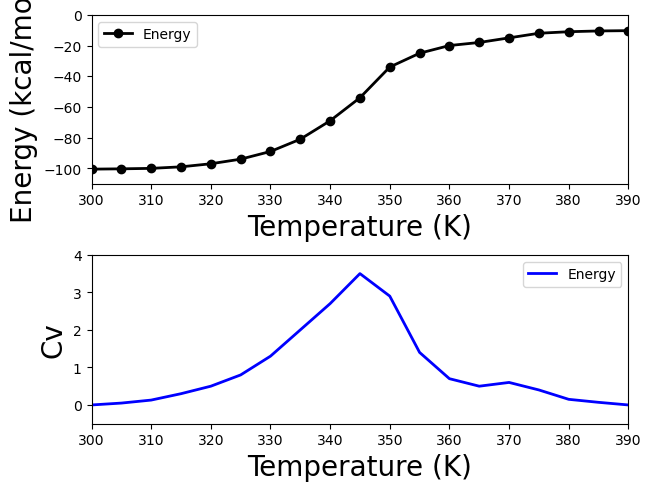

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 实验数据
T_exp = np.arange(300, 391, 5)
E_exp = np.array([-100.5, -100.3, -100, -99, -97, -94, -89, -81, -69, -54,\
                   -34, -25, -20, -18, -15, -12, -11, -10.5, -10.3])

# 写入实验数据
f = open('Data/蛋白质折叠数据.dat','w')
for ii in range(len(T_exp)):
    f.write('%f\t%f\n' %(T_exp[ii], E_exp[ii]))

# 读出实验数据
T = []
E = []
with open('Data/蛋白质折叠数据.dat','r') as fin:
    ii = 0
    for lines in fin:
        words = lines.split()
        T.append(float(words[0]))
        E.append(float(words[1]))

Cv = [0]*len(T)  # 对于列表而言，乘法表示复制n次，而对于数组而言，乘法则表示普通的矩阵乘法
# 中心差分法求一阶微分
for ii in range(1,len(T)-1):
    Cv[ii] = (E[ii+1] - E[ii-1])/(T[ii+1] - T[ii-1])
    
# 作图
fig, ax = plt.subplots(nrows = 2, ncols = 1,layout="constrained")
ax[0].plot(T,E, marker='o', color='k', linewidth=2.0, label='Energy')
ax[1].plot(T,Cv, color='b', linewidth=2.0, label='Energy')

ax[0].set_xlim(300, 390)
ax[0].set_ylim(-110, 0)
ax[1].set_xlim(300, 390)
ax[1].set_ylim(-0.5, 4)

ax[0].set_xlabel('Temperature (K)', fontsize=20)
ax[0].set_ylabel('Energy (kcal/mol)', fontsize=20)
ax[1].set_xlabel('Temperature (K)', fontsize=20)
ax[1].set_ylabel('Cv', fontsize=20)

ax[0].legend(loc='best')
ax[1].legend(loc='best')

plt.show()